# Data Analysis and Graph

## Import

In [1]:
import re
import numpy as np
import pandas as pd
import requests
from datetime import datetime
from bs4 import BeautifulSoup
import time
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import statsmodels.api as sm
import pylab as pl
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults
fl = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
plt.rc('font', family=fl)
%matplotlib inline
warnings.filterwarnings("ignore")

## Time and Count analysis

In [2]:
#매매건수 그래프 (시기, 매매건수)
#매매건수 날짜 글자형은 timecount
timecount=pd.read_csv("timecount_modify.csv")
timecount

,구분,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,09년01월,482,368,32,126,49,83,81,17,231,...,99,97,570,383,117,75,197,22,30,42
1,09년02월,480,353,49,232,110,149,146,54,463,...,124,185,510,391,198,92,203,40,52,76
2,09년03월,624,506,61,282,121,121,169,55,389,...,139,222,472,326,196,98,213,34,55,85
3,09년04월,787,817,97,399,200,225,325,71,720,...,278,259,708,559,398,162,184,55,94,165
4,09년05월,525,639,81,355,194,153,290,78,658,...,222,282,536,392,343,135,154,65,76,139
5,09년06월,813,727,106,502,207,235,346,77,1136,...,288,302,766,509,364,131,148,68,74,204
6,09년07월,687,600,102,461,227,168,324,80,723,...,270,307,561,460,406,127,158,44,92,230
7,09년08월,725,784,132,553,286,232,421,125,908,...,329,433,690,604,470,169,160,63,73,283
8,09년09월,495,406,119,391,244,159,355,127,656,...,268,328,453,451,340,142,183,36,62,234
9,09년10월,242,233,62,209,132,86,209,79,340,...,133,160,210,227,194,56,102,37,37,130


In [3]:
import datetime

In [4]:
#문자열을 datetime타입으로 변환
#문자열 09년01월
def str_to_datetime(string_data):
    date_data=datetime.datetime.strptime(string_data,"%y년%m월")
    return date_data

In [5]:
str_to_datetime("09년01월")

datetime.datetime(2009, 1, 1, 0, 0)

In [6]:
#timecount의 구분월 :timecount["구분"]
#에 str_to_datetime함수를 적용하고 리턴값을
#timecount["구분"]에 대입
timecount["구분"]=timecount["구분"].apply(str_to_datetime)

In [7]:
timecount

,구분,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
0,2009-01-01,482,368,32,126,49,83,81,17,231,...,99,97,570,383,117,75,197,22,30,42
1,2009-02-01,480,353,49,232,110,149,146,54,463,...,124,185,510,391,198,92,203,40,52,76
2,2009-03-01,624,506,61,282,121,121,169,55,389,...,139,222,472,326,196,98,213,34,55,85
3,2009-04-01,787,817,97,399,200,225,325,71,720,...,278,259,708,559,398,162,184,55,94,165
4,2009-05-01,525,639,81,355,194,153,290,78,658,...,222,282,536,392,343,135,154,65,76,139
5,2009-06-01,813,727,106,502,207,235,346,77,1136,...,288,302,766,509,364,131,148,68,74,204
6,2009-07-01,687,600,102,461,227,168,324,80,723,...,270,307,561,460,406,127,158,44,92,230
7,2009-08-01,725,784,132,553,286,232,421,125,908,...,329,433,690,604,470,169,160,63,73,283
8,2009-09-01,495,406,119,391,244,159,355,127,656,...,268,328,453,451,340,142,183,36,62,234
9,2009-10-01,242,233,62,209,132,86,209,79,340,...,133,160,210,227,194,56,102,37,37,130


In [8]:
timecount.set_index("구분", inplace=True)

In [9]:
timecount

,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
구분,,,,,,,,,,,,,,,,,,,,,
2009-01-01,482,368,32,126,49,83,81,17,231,97,...,99,97,570,383,117,75,197,22,30,42
2009-02-01,480,353,49,232,110,149,146,54,463,157,...,124,185,510,391,198,92,203,40,52,76
2009-03-01,624,506,61,282,121,121,169,55,389,208,...,139,222,472,326,196,98,213,34,55,85
2009-04-01,787,817,97,399,200,225,325,71,720,303,...,278,259,708,559,398,162,184,55,94,165
2009-05-01,525,639,81,355,194,153,290,78,658,285,...,222,282,536,392,343,135,154,65,76,139
2009-06-01,813,727,106,502,207,235,346,77,1136,458,...,288,302,766,509,364,131,148,68,74,204
2009-07-01,687,600,102,461,227,168,324,80,723,398,...,270,307,561,460,406,127,158,44,92,230
2009-08-01,725,784,132,553,286,232,421,125,908,338,...,329,433,690,604,470,169,160,63,73,283
2009-09-01,495,406,119,391,244,159,355,127,656,329,...,268,328,453,451,340,142,183,36,62,234


In [10]:
timecount["도봉구"]

구분
2009-01-01     97
2009-02-01    157
2009-03-01    208
2009-04-01    303
2009-05-01    285
2009-06-01    458
2009-07-01    398
2009-08-01    338
2009-09-01    329
2009-10-01    154
2009-11-01    121
2009-12-01    145
2010-01-01    180
2010-02-01    135
2010-03-01    167
2010-04-01    104
2010-05-01    111
2010-06-01     93
2010-07-01    100
2010-08-01    108
2010-09-01    138
2010-10-01    228
2010-11-01    262
2010-12-01    253
2011-01-01    336
2011-02-01    273
2011-03-01    280
2011-04-01    227
2011-05-01    194
2011-06-01    191
             ... 
2017-06-01    606
2017-07-01    674
2017-08-01    230
2017-09-01    227
2017-10-01    218
2017-11-01    250
2017-12-01    232
2018-01-01    373
2018-02-01    362
2018-03-01    504
2018-04-01    216
2018-05-01    221
2018-06-01    260
2018-07-01    327
2018-08-01    854
2018-09-01    408
2018-10-01    185
2018-11-01    107
2018-12-01    100
2019-01-01    105
2019-02-01     74
2019-03-01    128
2019-04-01    124
2019-05-01    154
2019-06

In [11]:
timecount.index

DatetimeIndex(['2009-01-01', '2009-02-01', '2009-03-01', '2009-04-01',
               '2009-05-01', '2009-06-01', '2009-07-01', '2009-08-01',
               '2009-09-01', '2009-10-01',
               ...
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01'],
              dtype='datetime64[ns]', name='구분', length=131, freq=None)

In [12]:
#그래프 X축의 시작일 09년 1월
start_date = np.min(timecount.index)
#그래프 X축 마지막일 19년 11월
end_date = np.max(timecount.index)
print("start_date:",start_date,":end_date:",end_date)

start_date: 2009-01-01 00:00:00 :end_date: 2019-11-01 00:00:00


In [13]:
#start_date 부터 :start=start_date
#end_date까지 :end=end_date
#6개월 마다 : freq="6MS"
#데이터를 갖는 리스트 생성 :pd.date_range
x_label_data=pd.date_range(start=start_date,end=end_date, freq="6MS")
x_label_data

DatetimeIndex(['2009-01-01', '2009-07-01', '2010-01-01', '2010-07-01',
               '2011-01-01', '2011-07-01', '2012-01-01', '2012-07-01',
               '2013-01-01', '2013-07-01', '2014-01-01', '2014-07-01',
               '2015-01-01', '2015-07-01', '2016-01-01', '2016-07-01',
               '2017-01-01', '2017-07-01', '2018-01-01', '2018-07-01',
               '2019-01-01', '2019-07-01'],
              dtype='datetime64[ns]', freq='6MS')

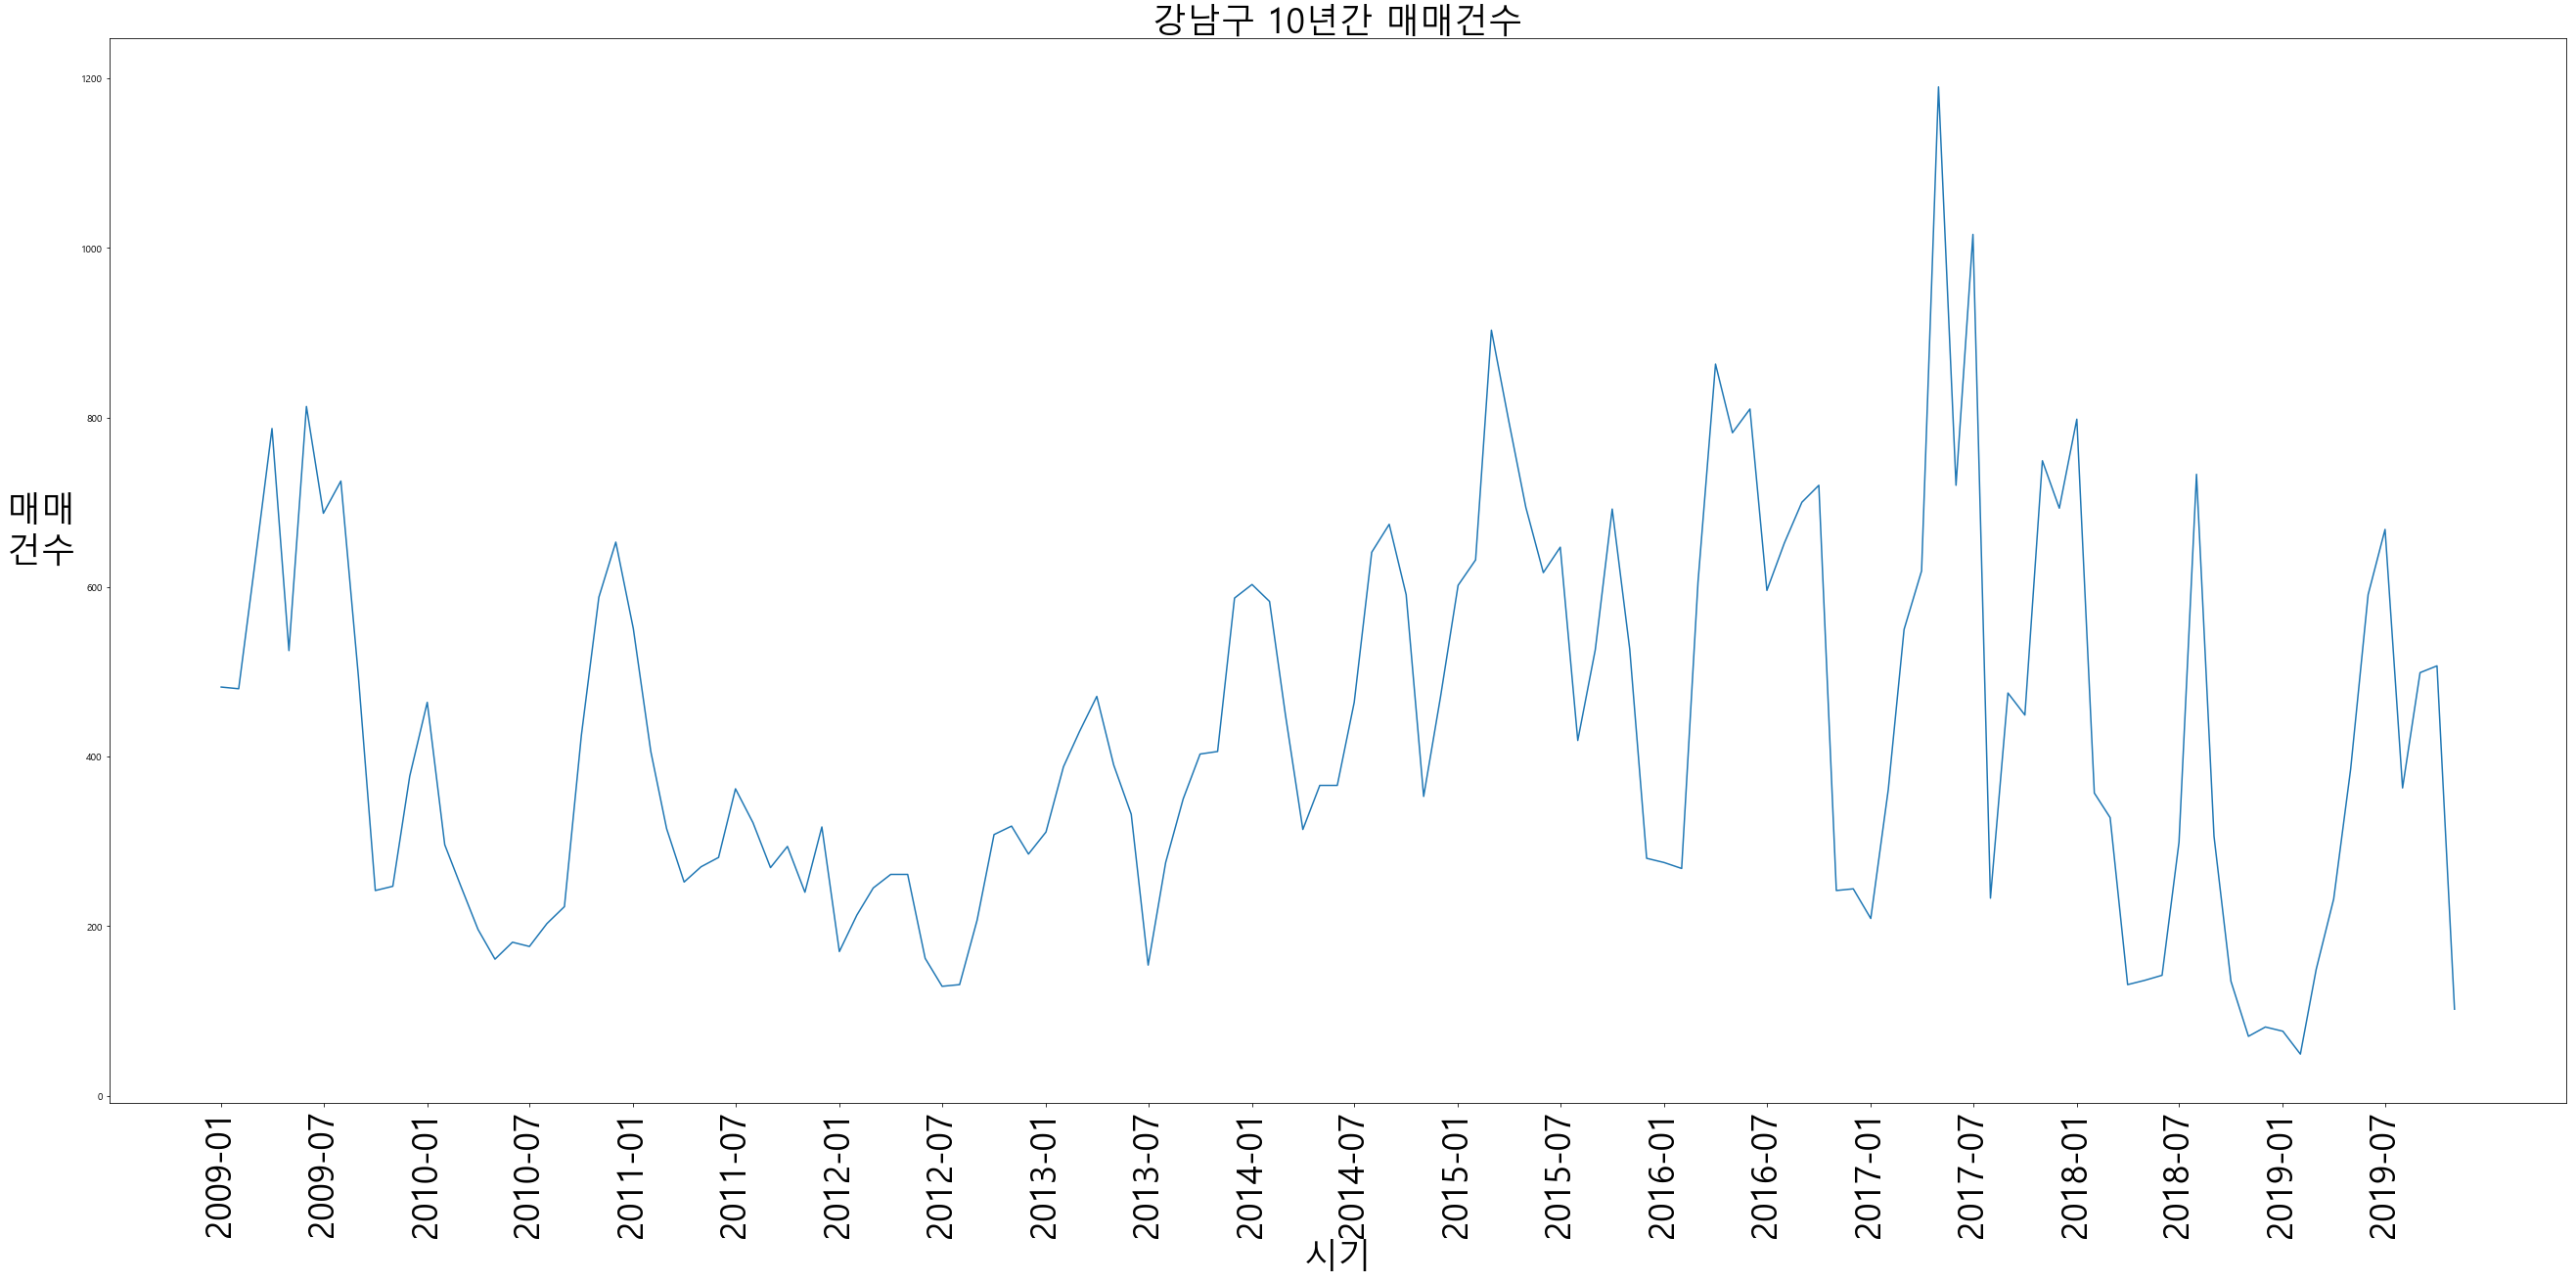

In [14]:
import matplotlib.dates as mdates
#그래프의 가로 세로 설정
plt.figure(figsize=(45,20))
plt.title("강남구 10년간 매매건수", fontsize=35)  

#그래프 모양을 설정하는 객체 ax리턴
ax = plt.subplot()
#x축의 타입을 date타입으로 설정
ax.xaxis_date()
#도봉구 데이터로 그래프 그림
ax.plot(timecount["강남구"])
#x축 데이터 설정
ax.set_xticks(x_label_data)
#글자 사이즈 설정
ax.tick_params(axis="x", labelsize=35)
#X축 형식 설정 %Y:년도 4자리 %m:월2자리
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#x축을 90도 회전
plt.xticks(rotation=90)
plt.xlabel("시기", fontsize=35)
plt.ylabel("매매      \n건수      ", fontsize=35, rotation=0)
plt.savefig("gangdong_count_graph.png", dpi=300)
plt.show()